# Ejercicios capitulo 2

**2.1**
Study the propagation of the relative error, for the case of division, $x = a/b$, by analogy to what was done in the main text for the case of multiplication.


 If     $x= \cfrac{a}{b}$ $\Rightarrow$ $\tilde{x}= \cfrac{\tilde{a}}{\tilde{b}}$ 

Now aply the definition of $\tilde{a}$

$\tilde{a}=a(1+\delta a)$   and $\tilde{b}=b(1+\delta b)$

Then 
$\delta x = \cfrac{\tilde{x}-x}{x}= \cfrac{\cfrac{\tilde{a}}{\tilde{b}}- \cfrac{a}{b}}{\cfrac{a}{b}}= \cfrac{\cfrac{a(1+\delta a)}{b(a+\delta b)}-\cfrac{a}{b}}{\cfrac{a}{b}}= \cfrac{\cfrac{a}{b} \left(\cfrac{1+\delta a}{1+\delta b} \right)-1} {\cfrac{a}{b}}$


$= \cfrac{1+\delta a}{1+ \delta b}-1= \cfrac{1+\delta a -1-\delta b}{1+ \delta b}= \cfrac{\delta a - \delta b}{1+\delta b}=\delta a-\delta b$

consider than $\delta b \ll 1$

R. Hence $|\delta x| \leq |\delta a|-|\delta b|$

**2.4** Without rounding error, the following code’s output would be $f (x) = x$ (Note that this has nothing to do with catastrophic cancellation.) Determine what’s going on, remembering our comment (section 2.4) on one or two iterations being the culprits.

In [47]:
from math import sqrt
def f(x,nmax=100):
    for i in range(nmax):
        x = sqrt(x)
    for i in range(nmax):
        x = x**2
    return x
for xin in (5., 0.5):
    xout = f(xin); print(xin, xout)

5.0 1.0
0.5 0.0


R. 

**2.7** We promised to return to the distinction between catastrophic and benign cancellation. Take $\tilde{x}$ and $\tilde{y}$ to be: $\tilde{x}= 1234567891234567.0$ and $\tilde{y} = 1234567891234566.0$
Now, if we try to evaluate $\tilde{x}^2 - \tilde{y}^2$ we will experience catastrophic cancellation: each
of the squaring operations leads to a rounding error and then the subtraction exacerbates that dramatically. Write a Python code that does the following:

(a) Carries out the calculation $1234567891234567^2 − 1234567891234566^2$ using integers, i.e., exactly.

(b) Carries out the subtraction
$1234567891234567.0^2−1234567891234566.0^2$ using
ﬂoats, i.e., exhibiting catastrophic cancellation.

(c) Now, we will employ a trick: $x^2 − y^2$ can be re-expressed as $(x − y)(x + y)$. Try
using this trick for the ﬂoats and see what happens. Does your answer match the integer answer or the catastrophic-cancellation answer? Why?


In [120]:
x=1234567891234567
y=1234567891234566
x0=1234567891234567.0
y0=1234567891234566.0

In [121]:
rx=pow(x,2)
ry=pow(y,2)

In [122]:
r=rx-ry

In [123]:
print(rx), print(ry), print (r)

1524157878067365654031415677489
1524157878067363184895633208356
2469135782469133


(None, None, None)

In [124]:
r0=x0**2-y0**2

In [125]:
print(r0)

2533274790395904.0


In [126]:
rt1=(x-y)
rt2=(x+y)

rt10=(x0-y0)
rt20=(x0+y0)


In [127]:
rt=rt1*rt2
rt0=rt10*rt20

In [128]:
print(rt), print(rt0)

2469135782469133
2469135782469133.0


(None, None)

In [129]:
s=rt-r
s0=rt-r0
s1=rt0-r
s10=rt0-r0

In [130]:
print(s), print(s0), print (s1), print(s10)

0
-64139007926771.0
0.0
-64139007926771.0


(None, None, None, None)

R. We can evade the catastrophic cancellation with use of integers, or use elemental operation instead of operations more difficults with float


**2.10** As a statistical warmup to chapters 6 and 7, evaluate the mean of the n values $x_i : \mu = \sum_{i=0}^{n−1} \cfrac{ x_i} {n}$. You can evaluate the variance using a two-pass algorithm:

$\sigma^2=\cfrac{1}{n}\sum_{i=0}^{n-1}(x_i-\mu)^2$

This is called a two-pass algorithm because you need to evaluate the mean ﬁrst, so you have to loop through the xi once to get the mean and a second time time to get the variance. Many people prefer the following one-pass algorithm:

$\sigma^2=\left(\cfrac{1}{n}\sum_{i=0}^{n-1}x_i^2\right)-\mu^2$

You should be able to see that this formula allows you to keep running sums of the $x_i$ and the $x_i^2$ values in parallel and then perform only one subtraction at the end.
Naively, you might think that the two-pass algorithm will suﬀer from more roundoﬀ error problems, since it involves n subtractions. On the other hand, if you solved problem 2.7 on $\tilde{x}^2 − \tilde{y}^2$ , you might be more wary of subtracting the squares of two
nearly equal numbers (which is what the one-pass algorithm does). Write two Python functions, one for each algorithm, and test them on the two cases below: 

$x_i=0, 0.01, 0.02,..., 0.09$
$x_i=123456789.0, 123456789.01, 123456789.02,..., 123456789.09$


In [108]:
import numpy as np

def numeros(ini,fi,N):
    numeros=np.linspace(ini,fi,N)
    return numeros

def mu(ini,fi,N):
    suma=0
    numeros=np.linspace(ini,fi,N)
    for i in numeros:
        suma+=i
    m=suma/N
    return m

def resta(x,ini,fi,N):
    return (x-mu(ini,fi,N))**2    

def v(ini,fi,N):
    numeros2=resta(numeros(ini,fi,N),ini,fi,N)
    suma=0
    for i in numeros2:
        suma+=i
    va=suma/N
    return va

In [109]:
print(numeros(1.00,1.09,10)), print (mu(1.00,1.09,10)), print(numeros2), print(v(1.00,1.09,10))

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09]
1.045
[0.2025 0.1225 0.0625 0.0225 0.0025 0.0025 0.0225 0.0625 0.1225 0.2025]
0.0008250000000000014


(None, None, None, None)

In [116]:
import numpy as np

def numeros(ini,fi,N):
    numeros=np.linspace(ini,fi,N)
    return numeros

def mu1(ini,fi,N):
    suma=0
    numeros=np.linspace(ini,fi,N)
    for i in numeros:
        suma+=i
    m=suma/N
    return m

def po(x):
    return (x)**2

def var(ini,fi,N):
    numeross=po(numeros(ini,fi,N))
    suma=0
    for i in numeross:
        suma+=i
    var=(suma/N)-(mu1(ini,fi,N))**2
    return var


In [117]:
print(mu1(1.00,1.09,10)), print(var(1.00,1.09,10))

1.045
0.0008250000000000757


(None, None)

In [112]:
print(numeros(123456789.00,123456789.09,10)), print (mu(123456789.00,123456789.09,10)) ,print(v(123456789.00,123456789.09,10))

[1.23456789e+08 1.23456789e+08 1.23456789e+08 1.23456789e+08
 1.23456789e+08 1.23456789e+08 1.23456789e+08 1.23456789e+08
 1.23456789e+08 1.23456789e+08]
123456789.04499999
0.0008250000357630238


(None, None, None)

In [118]:
print(mu1(123456789.00,123456789.09,10)), print(var(123456789.00,123456789.09,10))

123456789.04499999
4.0


(None, None)

**2.13** This problem studies a new rational function:

$t(x)=\cfrac{7x^4-101x^3+540x^2-1204x+958}{x^4-14x^3+72x^2-151x+112}$

Notice that the denominator is the same as in problem 2.12.

(a) Plot $t(x)$, evaluated via Horner’s rule, along with the following (equivalent) continued fraction, from $x = 0$ to $x = 4$:

$u(x)=7-\cfrac{3}{x-2-\cfrac{1}{x-7+\cfrac{10}{x-2-\cfrac{2}{x-3}}}}$

You may wish to know that:

$u(1)=10, u(2)=7, u(3)=4.6, u(4)=5.5 $

(b) Evaluate each of these functions for $x = 10^{77}$ (make sure to use ﬂoats in your
code). Do you understand what is happening? Are you starting to prefer one
formulation over the other? (What happens if you use integers instead of ﬂoats?)

(c) Plot the two Python functions (t(x) and u(x)) for $x = 2.400 + 2^{−52} i$, where i goesfrom 0 to 800. Was your intuition (about which formulation is better) correct?

In [2]:
def horner(coef,x0,xf):
    n=len(coef)
    x=xf-x0
    for i in range (x):
        poli=coef[n-1]
        polin=0
        for j in range(n-1,0,-1):
            polin=(poli)*i+coef[j-1]
            poli=polin
       # print ([i,poli])
    return poli

def horner2(x):
    coef=[958,-1204,540,-101,7]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range(n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    #print ([x,poli]) 
    return poli

def horner3(x):
    coef=[112,-151,72,-14,1]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range(n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    #print ([x,poli]) 
    return poli

In [3]:
def u(x):
    ux=7-3/(x-2-1/(x-7+10/(x-2-2/(x-3))))
    return ux


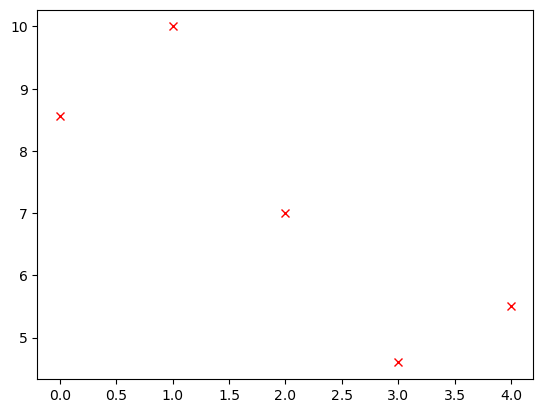

In [41]:
from matplotlib import pyplot
x = range(0, 5)
pyplot.plot(x, [horner2(i)/horner3(i) for i in x],'rx')
pyplot.show()


In [8]:
eh=horner2(pow(10,77))/horner3(pow(10,77))
eu=u(pow(10,77))
print("horner=",eh,"ux=", eu)


horner= 7.0 ux= 7.0


In [50]:
2**(-52)

horner4(2.4+2**(-52)*3)/horner5(2.4+2**(-52)*3), horner4(2.4+2**(-52)*400)/horner5(2.4+2**(-52)*400)


(0.7407108239095263, 0.7407108239095342)

In [52]:
def horapp(x):
    return horner4(x)/horner5(x)

[horapp(2.4+2**(-52)*i) for i in range(0,800,100)]


[0.7407108239095289,
 0.7407108239095204,
 0.7407108239095199,
 0.740710823909548,
 0.7407108239095342,
 0.7407108239095104,
 0.7407108239095305,
 0.7407108239095013]

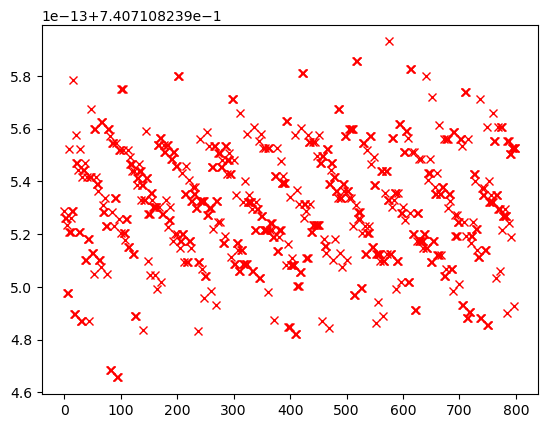

In [58]:
Hlist = [horapp(2.400+pow(2,-52)*i) for i in x]

from matplotlib import pyplot
x = range(0,800)
pyplot.plot(x, [horapp(2.400+pow(2,-52)*i) for i in x] , 'rx')
pyplot.show()


In [12]:
def horner(coef,x0,xf):
    n=len(coef)
    x=xf-x0
    for i in range (x):
        poli=coef[n-1]
        polin=0
        for j in range(n-1,0,-1):
            polin=(poli)*i+coef[j-1]
            poli=polin
       # print ([i,poli])
    return poli

def horner4(x):
    coef=[622,-751,324,-59,4]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range(n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    #print ([x,poli]) 
    return poli
def horner5(x):
    coef=[112,-151,72,-14,1]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range(n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    #print ([x,poli]) 
    return poli

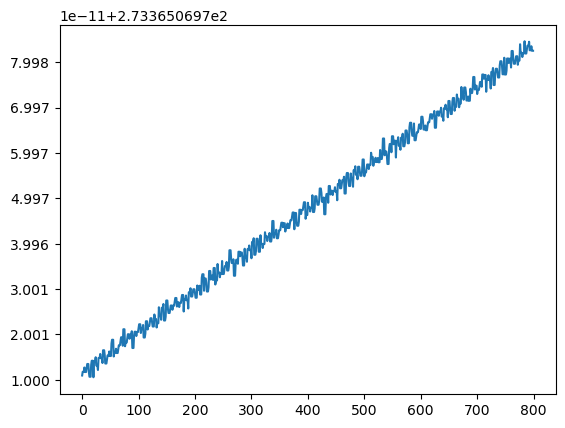

In [40]:
from matplotlib import pyplot
x = range(0,800)
pyplot.plot(x, [horner4((2.400+pow(2,-52)*i)/horner5(2.400+pow(2,-52)*i)) for i in x])
pyplot.show()


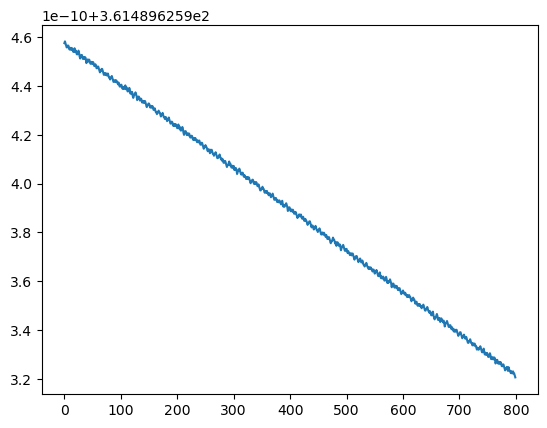

In [25]:
from matplotlib import pyplot
x = range(0,800)
pyplot.plot(x, [horner4((1.606+(pow(2,-52)*i))/horner5(1.606+(pow(2,-52)*i))) for i in x])
pyplot.show()
